# animation_example

This is a simple example of animation of jumping ball.
The animation can be stopped by "interrupt kernel" button on the above menu,
and be restarted by re-executing cells.

In [1]:
#require "cairo2";;
#require "iocaml-kernel";;
#require "lwt.simple-top";;
#require "lwt.unix";;

/home/opam/.opam/4.04.1/lib/ocaml/unix.cma: loaded
/home/opam/.opam/4.04.1/lib/ocaml/bigarray.cma: loaded
/home/opam/.opam/4.04.1/lib/cairo2: added to search path
/home/opam/.opam/4.04.1/lib/cairo2/cairo2.cma: loaded
/home/opam/.opam/4.04.1/lib/easy-format: added to search path
/home/opam/.opam/4.04.1/lib/easy-format/easy_format.cmo: loaded
/home/opam/.opam/4.04.1/lib/biniou: added to search path
/home/opam/.opam/4.04.1/lib/biniou/biniou.cma: loaded
/home/opam/.opam/4.04.1/lib/yojson: added to search path
/home/opam/.opam/4.04.1/lib/yojson/yojson.cmo: loaded
/home/opam/.opam/4.04.1/lib/ocaml/str.cma: loaded
/home/opam/.opam/4.04.1/lib/atd: added to search path
/home/opam/.opam/4.04.1/lib/atd/atd.cma: loaded
/home/opam/.opam/4.04.1/lib/atdgen: added to search path
/home/opam/.opam/4.04.1/lib/atdgen/atdgen.cma: loaded
/home/opam/.opam/4.04.1/lib/bytes: added to search path
/home/opam/.opam/4.04.1/lib/result: added to search path
/home/opam/.opam/4.04.1/lib/result/result.cma: loaded
/home

In [2]:
open Lwt.Infix ;;

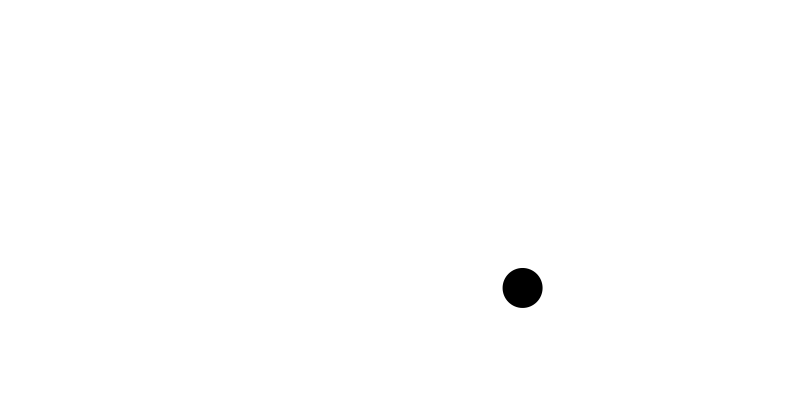

val pi2 : float = 6.28318530717958

val w : float = 800.

val h : float = 400.

val r : float = 20.

val e : float = -0.9

val g : float = 1.

val m : float = 1.

val plot_ball : context:Iocaml.cell_context -> float -> float -> unit = <fun>

val context : Iocaml.cell_context = <abstr>

Interrupted.

In [4]:
let pi2 = 2.0 *. 3.14159265358979 ;;
let w = 800. ;;
let h = 400. ;;
let r = 20.0 ;;
let e = -0.9 ;;
let g = 1.0 ;; (* gravity *)
let m = 1.0 ;; (* mass *)

let plot_ball ~context x y =
  let surface = Cairo.Image.create Cairo.Image.ARGB32 ~width:800 ~height:400 in
  let ctx = Cairo.create surface in
  Cairo.arc ctx ~x ~y ~r ~a1:0.0 ~a2:pi2 ;
  Cairo.fill ctx ;
  Cairo.PNG.write_to_stream ~output:(output_string Iocaml.mime) surface  ;
  Iocaml.send_clear ~context () ;
  Iocaml.send_mime ~context ~base64:true "image/png"
;;

let context = Iocaml.cell_context() ;;
let _ =
  let rec aux x y vx vy () =
    let x, vx = if x < 0.0 then (0.0, e *. vx) else if x > w then (w, e *. vx) else (x +. vx, vx) in
    let y, vy = if y < 0.0 then (0.0, e *. vy) else if y > h then (h, e *. vy) else (y +. vy, vy +. m *. g) in
    plot_ball ~context x y ;
    Lwt_unix.sleep 0.01 >>= aux x y vx vy
  in
  Lwt_main.run (aux 0.0 0.0 10.0 0.0 ())